In [30]:
from __future__ import division#, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from scipy.stats import skew
from scipy.stats import boxcox
%matplotlib inline
from matplotlib import rcParams
from imblearn.over_sampling import SMOTE
rcParams['figure.figsize'] = (15, 7)
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
red = pd.read_csv('/home/pirl/test/Wine data/wine_quality_r_s.csv')
red = red.drop('Unnamed: 0',1)

In [36]:
quality_mapping = {3:3, 4:4, 5:5, 6:5, 7:6, 8:7}
red['quality'] = red['quality'].map(quality_mapping)

In [37]:
red_x = red.drop('quality',1)
red_y = red['quality']

In [38]:
for cur_feat in red_x.columns:
    if cur_feat == 'citric acid':
        red_x[cur_feat] += 1
    red_x[cur_feat] = np.log(red_x[cur_feat])

In [7]:
red_h = red[red['quality']>=6]

In [8]:
red_m = red[(red['quality']<6)&(red['quality']>4)]

In [9]:
red_l = red[red['quality']<=4]

In [10]:
red_l2 = pd.concat([red_l,red_l,red_l])

In [11]:
red_m = red_m.sample(800)

In [12]:
red_h2 = pd.concat([red_h,red_h])
red_h2 = red_h2.sample(300)

In [13]:
red_sp = pd.concat([red_l2,red_m,red_h2])

In [14]:
size = red_sp['quality'].value_counts()
size.reindex = [3,4,5,6,7]

In [15]:
size

5    800
6    277
4    156
3     30
7     23
Name: quality, dtype: int64

In [16]:
red_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 18 to 1106
Data columns (total 12 columns):
fixed acidity           1286 non-null float64
volatile acidity        1286 non-null float64
citric acid             1286 non-null float64
residual sugar          1286 non-null float64
chlorides               1286 non-null float64
free sulfur dioxide     1286 non-null float64
total sulfur dioxide    1286 non-null float64
density                 1286 non-null float64
pH                      1286 non-null float64
sulphates               1286 non-null float64
alcohol                 1286 non-null float64
quality                 1286 non-null int64
dtypes: float64(11), int64(1)
memory usage: 130.6 KB


In [17]:
red_sp_x = red_sp.drop('quality',1)
red_sp_y = red_sp['quality']

In [18]:
v_feature_name = red_sp_x.columns
scaler = StandardScaler()
red_sp_s_x = scaler.fit_transform(red_sp_x)
red_sp_s_x = pd.DataFrame(red_sp_s_x, columns=v_feature_name)
red_sp_s_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.539868,0.282212,-0.981021,1.306709,0.004807,-0.860060,-0.427624,0.372766,0.406938,-0.962600,-1.410216
1,-1.483848,2.967414,-0.931244,-0.761071,1.959421,-0.763150,-0.738087,-1.438920,1.188017,-1.082825,-0.676182
2,0.237528,0.381664,0.114069,0.165865,0.050263,0.205953,0.100164,0.479336,-0.374140,-0.902487,-1.134953
3,-2.094659,-0.065870,-0.632583,-0.333254,-0.722491,-0.666239,0.690045,-1.758630,3.791614,-0.601923,2.351707
4,-0.040113,0.704883,-0.085039,-0.333254,-0.040649,-0.375508,0.007025,0.479336,-0.048691,-0.782261,-1.226707


In [19]:
train_n_x, test_n_x, train_n_y, test_n_y = train_test_split(red_sp_s_x, red_sp_y, test_size = 0.2,
                                                                random_state =42)

In [20]:
red_x = red.drop('quality',1)
red_y = red['quality']

In [21]:
train_x, test_x, train_y, test_y = train_test_split(red_x, red_y, test_size = 0.5,
                                                                random_state =1234)

In [22]:
v_feature_name = train_x.columns
scaler = StandardScaler()
test_s_x = scaler.fit_transform(test_x)
test_s_x = pd.DataFrame(test_s_x, columns=v_feature_name)
test_s_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.080028,-0.844231,1.089943,-0.500262,1.636957,-1.051928,-0.890049,0.464167,-0.116612,2.481746,-0.965829
1,-0.980622,0.221571,-1.257401,-0.309515,0.665431,-0.958421,-0.919190,-0.087211,0.406465,0.228362,-0.873723
2,-1.100702,0.221571,-1.257401,-0.500262,-0.444885,-1.145435,-1.064900,0.152066,0.929543,0.165768,-0.873723
3,2.801875,-1.012515,1.140972,2.043024,-0.468016,-1.051928,-0.365495,2.440804,-0.770459,0.040580,1.428935
4,0.100091,-0.900325,0.834797,-0.182351,-0.537411,-0.397377,-0.831765,-0.628186,-0.966614,0.979490,0.692085


In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_n_x,train_n_y)
tree_pred_t = decision_tree.predict(train_n_x)
tree_pred = decision_tree.predict(test_s_x)

rf = RandomForestClassifier()
rf.fit(train_n_x,train_n_y)
rf_pred_t = rf.predict(train_n_x)
rf_pred = rf.predict(test_s_x)

KN = KNeighborsClassifier()
KN.fit(train_n_x,train_n_y)
KN_pred_t = KN.predict(train_n_x)
KN_pred = KN.predict(test_s_x)

Gaussian = GaussianNB()
Gaussian.fit(train_n_x,train_n_y)
Gaussian_pred_t = Gaussian.predict(train_n_x)
Gaussian_pred = Gaussian.predict(test_s_x)

svc = SVC()
svc.fit(train_n_x,train_n_y)
svc_pred_t = svc.predict(train_n_x)
svc_pred = svc.predict(test_s_x)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
print('Decision Tree:', accuracy_score(train_n_y, tree_pred_t)*100,'%')
print('Random Forest:', accuracy_score(train_n_y, rf_pred_t)*100,'%')
print('KNeighbors:',accuracy_score(train_n_y, KN_pred_t)*100,'%')
print('GaussianNB:',accuracy_score(train_n_y, Gaussian_pred_t)*100,'%')
print('SVC:',accuracy_score(train_n_y, svc_pred_t)*100,'%')

Decision Tree: 100.0 %
Random Forest: 99.31906614785993 %
KNeighbors: 82.87937743190662 %
GaussianNB: 63.13229571984436 %
SVC: 76.84824902723736 %


In [32]:
print('Decision Tree:', accuracy_score(test_y, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(test_y, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(test_y, KN_pred)*100,'%')
print('GaussianNB:',accuracy_score(test_y, Gaussian_pred)*100,'%')
print('SVC:',accuracy_score(test_y, svc_pred)*100,'%')

Decision Tree: 80.22528160200251 %
Random Forest: 89.73717146433042 %
KNeighbors: 76.34543178973718 %
GaussianNB: 63.07884856070088 %
SVC: 83.35419274092615 %


In [23]:
print(confusion_matrix(test_y, tree_pred))
print('')
print(confusion_matrix(test_y, rf_pred))
print('')
print(confusion_matrix(test_y, KN_pred))
print('')
print(confusion_matrix(test_y, Gaussian_pred))
print('')
print(confusion_matrix(test_y, svc_pred))


[[  4   0   0   0   0]
 [  0  27   1   0   0]
 [  2  23 609  24   0]
 [  0   0  13  81   0]
 [  0   0   4   4   7]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(test_y, tree_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))
print(classification_report(test_y, rf_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))
print(classification_report(test_y, KN_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))
print(classification_report(test_y, Gaussian_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))
print(classification_report(test_y, svc_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))

              precision    recall  f1-score   support

     class 3       0.11      0.25      0.15         4
     class 4       0.29      0.71      0.41        28
     class 5       0.95      0.81      0.87       658
     class 6       0.51      0.78      0.62        94
     class 7       0.33      0.33      0.33        15

    accuracy                           0.79       799
   macro avg       0.44      0.58      0.48       799
weighted avg       0.86      0.79      0.81       799

              precision    recall  f1-score   support

     class 3       0.60      0.75      0.67         4
     class 4       0.50      0.93      0.65        28
     class 5       0.96      0.91      0.93       658
     class 6       0.67      0.78      0.72        94
     class 7       1.00      0.67      0.80        15

    accuracy                           0.89       799
   macro avg       0.75      0.81      0.75       799
weighted avg       0.91      0.89      0.89       799

              precisio

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,30)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = v_n_estimators)
    rf.fit(train_n_x,train_n_y)
    train_score.append(rf.score(train_n_x,train_n_y))
    test_score.append(rf.score(test_n_x, test_n_y))

df_score_tree = pd.DataFrame()
df_score_tree["n_estimators"] = para_n_tree
df_score_tree["TrainScore"] = train_score
df_score_tree["validationscore"] = test_score
df_score_tree.round(3) #트리 개수에 따른 트레인 셋 스코어와 밸리데이션 셋 스코어 비교

,n_estimators,TrainScore,validationscore
0,10,0.991,0.876
1,20,0.997,0.907
2,30,0.999,0.911
3,40,1.000,0.922
4,50,1.000,0.922
5,60,1.000,0.919
6,70,1.000,0.922
7,80,1.000,0.919
8,90,1.000,0.926
9,100,1.000,0.926


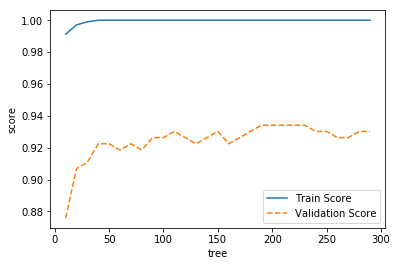

In [26]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("tree")
plt.legend() #트리 개수에 따른 트레인 셋 스코어와 밸리데이션 셋 스코어 그래프 비교

In [27]:
oob_error=[]
    
for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(red_sp_s_x, red_sp_y)
    oob_error.append(1-rf.oob_score_)
    
# 트리 개수에 따른 oob 확인

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not hav

Text(0.5, 0, 'n_estimators')

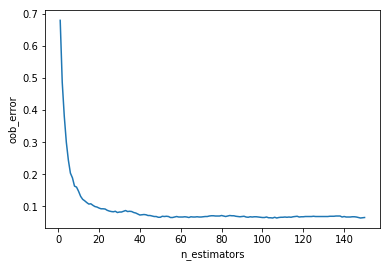

In [28]:
plt.plot(range(1,151),oob_error)
plt.ylabel("oob_error")
plt.xlabel("n_estimators")
# 트리 개수에 따른 oob 확인// 트리 개수가 늘어남에 따라 에러가 줄어듬. 35개 정도에서 가장 낮은 에러.

In [29]:
train_score = []; test_score = []
para_depth = [depth*2 for depth in range(1,15)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state = 1234,n_estimators = 100, max_depth = v_max_depth)
    rf.fit(train_n_x,train_n_y)
    train_score.append(rf.score(train_n_x,train_n_y))
    test_score.append(rf.score(test_n_x, test_n_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["Validationscore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,Validationscore
0,2,0.663,0.702
1,4,0.750,0.748
2,6,0.854,0.783
3,8,0.947,0.868
4,10,0.986,0.919
5,12,0.996,0.930
6,14,1.000,0.938
7,16,1.000,0.915
8,18,1.000,0.926
9,20,1.000,0.926


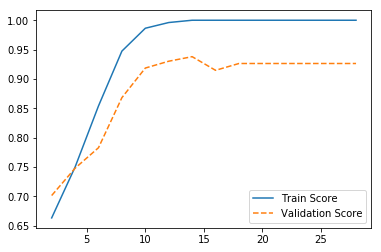

In [30]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Validation Score")
plt.legend()

In [31]:
train_score = []; test_score = []
para_split = [n_split*1 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = 100, max_depth = 16,
                              min_samples_split = v_min_samples_split)
    rf.fit(train_n_x,train_n_y)
    train_score.append(rf.score(train_n_x,train_n_y))
    test_score.append(rf.score(test_n_x, test_n_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["Validationscore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,Validationscore
0,2,1.000,0.915
1,3,1.000,0.950
2,4,0.998,0.926
3,5,0.995,0.907
4,6,0.989,0.911
5,7,0.988,0.903
6,8,0.980,0.888
7,9,0.973,0.872
8,10,0.970,0.864
9,11,0.966,0.868


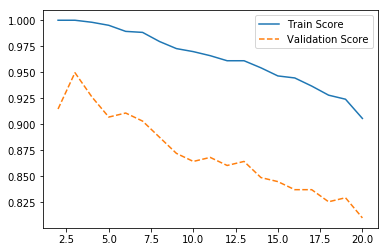

In [32]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Validation Score")
plt.legend()

In [33]:
train_score = []; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = 70, 
                                max_depth = 14, min_samples_split = 2,min_samples_leaf = v_min_samples_leaf)
    rf.fit(red_sp_x, red_sp_y)
    train_score.append(rf.score(red_sp_x, red_sp_y))
    test_score.append(rf.score(test_s_x, test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["Validationcore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,Validationcore
0,1,0.999,0.652
1,2,0.990,0.567
2,3,0.982,0.615
3,4,0.970,0.615
4,5,0.944,0.638
5,6,0.922,0.666
6,7,0.886,0.673
7,8,0.859,0.670
8,9,0.848,0.697
9,10,0.820,0.660


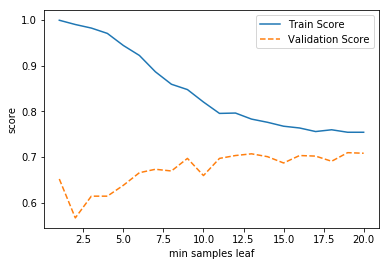

In [34]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [35]:
rf = RandomForestClassifier(random_state = 1234,n_estimators = 70, max_depth = 14)
rf.fit(train_n_x, train_n_y) # 최종모델 형성
rf_pred = rf.predict(test_n_x)

In [36]:
print('Random Forest:', accuracy_score(test_n_y, rf_pred)*100,'%')

Random Forest: 92.24806201550388 %


In [37]:
print(confusion_matrix(test_n_y, rf_pred))

[[ 10   0   0   0   0]
 [  0  24   0   0   0]
 [  0   4 153   8   0]
 [  0   0   8  48   0]
 [  0   0   0   0   3]]


In [38]:
print(classification_report(test_n_y, rf_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))

              precision    recall  f1-score   support

     class 3       1.00      1.00      1.00        10
     class 4       0.86      1.00      0.92        24
     class 5       0.95      0.93      0.94       165
     class 6       0.86      0.86      0.86        56
     class 7       1.00      1.00      1.00         3

    accuracy                           0.92       258
   macro avg       0.93      0.96      0.94       258
weighted avg       0.92      0.92      0.92       258



In [24]:
rf = RandomForestClassifier(random_state = 123,n_estimators = 150, max_depth = 16)
rf.fit(train_n_x, train_n_y) # 최종모델 형성
rf_pred = rf.predict(test_s_x)

In [25]:
print('Random Forest:', accuracy_score(test_y, rf_pred)*100,'%')
print(confusion_matrix(test_y, rf_pred))

Random Forest: 91.6145181476846 %
[[  3   0   1   0   0]
 [  0  26   2   0   0]
 [  0  15 610  33   0]
 [  0   0   8  86   0]
 [  0   0   0   8   7]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(test_y, tree_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))
print(classification_report(test_y, rf_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))
print(classification_report(test_y, KN_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))
print(classification_report(test_y, Gaussian_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))
print(classification_report(test_y, svc_pred, target_names=['class 3', 'class 4', 'class 5', 'class 6', 'class 7']))

              precision    recall  f1-score   support

     class 3       0.11      0.25      0.15         4
     class 4       0.29      0.71      0.41        28
     class 5       0.95      0.81      0.87       658
     class 6       0.51      0.78      0.62        94
     class 7       0.33      0.33      0.33        15

    accuracy                           0.79       799
   macro avg       0.44      0.58      0.48       799
weighted avg       0.86      0.79      0.81       799

              precision    recall  f1-score   support

     class 3       1.00      1.00      1.00         4
     class 4       0.68      0.96      0.79        28
     class 5       0.98      0.94      0.96       658
     class 6       0.73      0.87      0.79        94
     class 7       1.00      0.73      0.85        15

    accuracy                           0.93       799
   macro avg       0.88      0.90      0.88       799
weighted avg       0.94      0.93      0.93       799

              precisio

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
red_sp_x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,8.349456,0.538414,0.271135,2.612753,0.085647,15.012830,42.972395,0.996670,3.318243,0.659005,10.520581
std,1.809240,0.201212,0.202153,1.569334,0.041828,10.365745,32.633530,0.001943,0.156810,0.165322,1.103382
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.870000,0.330000,8.400000
25%,7.100000,0.390000,0.080000,1.900000,0.068000,7.000000,19.000000,0.995460,3.210000,0.550000,9.600000
50%,7.900000,0.520000,0.260000,2.200000,0.078000,12.000000,34.000000,0.996665,3.320000,0.620000,10.300000
75%,9.300000,0.648750,0.440000,2.600000,0.090000,21.000000,55.000000,0.997800,3.410000,0.740000,11.200000
max,15.600000,1.580000,0.780000,15.500000,0.467000,72.000000,289.000000,1.003690,3.900000,1.980000,14.000000


In [69]:
model = ['DescisionTree', 'RandomForest', 'KNN', 'GaussianNB', 'SVC']
col = ['Accuracy', 'Precision','Recall', 'F1Score']

In [79]:
df_eval = pd.DataFrame(index = model)

In [97]:
Accuracy = pd.Series([80, 94, 77, 64, 83], index = model)
Precision = pd.Series([86, 94, 84, 82, 84], index = model)
Recall = pd.Series([79, 93, 76, 63, 83], index = model)
F1Score = pd.Series([81, 94, 79, 69, 83], index= model)

In [98]:
df_eval['Accuracy']=Accuracy
df_eval['Precision']=Precision
df_eval['Recall']=Recall
df_eval['F1Score']=F1Score

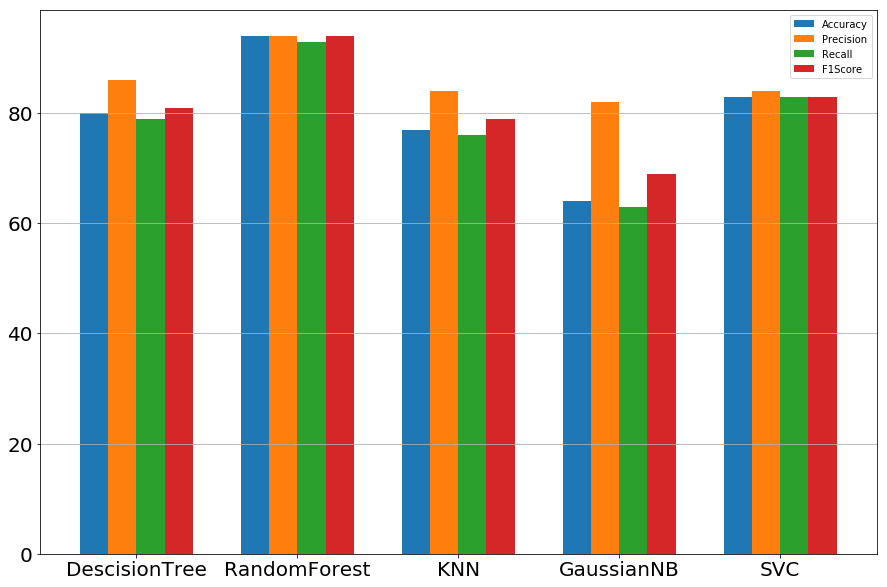

In [111]:
df_eval.plot.bar(rot=0, figsize = (15,10), width = 0.7, fontsize = 20)
plt.legend(loc = "upper right")
plt.grid(axis="y")

In [26]:
v_feature_name = train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf.feature_importances_
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,volatile acidity,0.141
10,alcohol,0.133
9,sulphates,0.111
6,total sulfur dioxide,0.098
2,citric acid,0.085
7,density,0.077
4,chlorides,0.075
0,fixed acidity,0.074
3,residual sugar,0.073
8,pH,0.073


Text(0, 0.5, '변수')

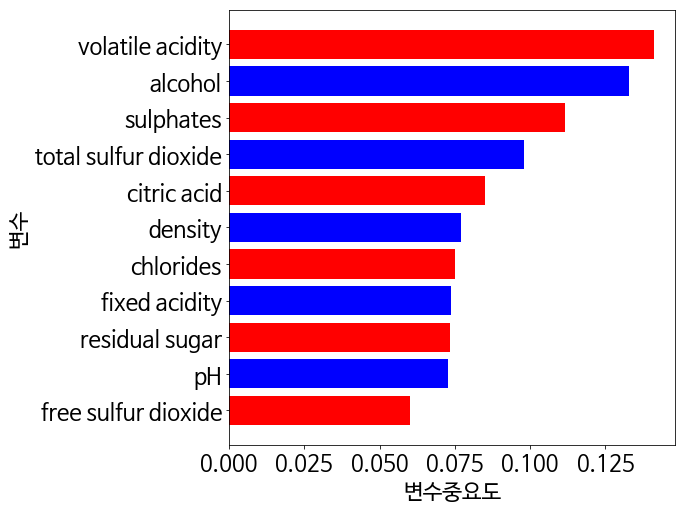

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
mpl.rc("font", family = "NanumBarunGothic")
plt.rcParams.update({'font.size': 22})
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize=(8,8))
plt.barh(y = coordinates, width = df_importance["Importance"], color = ['r','b'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")